In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps-v2.0.monthly.nc')
 

data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 496)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-04-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 299)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2005-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 100)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(longitude=slice(86,94),latitude=slice(18,28))
#jjas_data

In [8]:
#interpolating to new lat and lon

new_lon = np.arange(86.125,94,0.25)
new_lat = np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(latitude=new_lat,longitude=new_lon)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, latitude: 40, longitude: 32)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
  * latitude   (latitude) float64 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
  * longitude  (longitude) float64 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
Data variables:
    precip     (time, latitude, longitude) float64 nan nan nan ... 230.4 188.8
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (latitude: 40, longitude: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [248.97755749, 275.25243236, 338.84412057, ..., 204.03614261,
        273.31148629, 398.09106578],
       [313.03271664, 304.99211095, 340.8316294 , ..., 159.18378839,
        245.99790449, 286.82859662],
       [300.33862548, 273.78465935, 231.78277314, ..., 220.4120114 ,
        251.78057762, 284.67563873]])
Coordinates:
  * latitude   (latitude) float64 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
  * longitude  (longitude) float64 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167



chirps = pr_mm
 

In [11]:
#opening the remo noresm data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/remo/NorESM1/pr_WAS-22_NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1_day_remap_1981-2005.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 9131, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 2005-12-31T12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/36)
    CDI:                            Climate Data Interface version 1.9.9rc1 (...
    Conventions:                    CF-1.4
    history:                        Tue Sep 13 21:29:25 2022: cdo remapnn,gri...
    source:                         GERICS-REMO2015
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    ...                             ...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/a5bf17ab-c247-4be0-a27e-06f8...
    CDO:                            Climate Data Operators version 1.9.9rc1 (...

In [12]:
#data.lon.values


In [13]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 3050, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T12:00:00 ... 2005-09-30T12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 1981-06-02 ... 2005-10-01
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/36)
    CDI:                            Climate Data Interface version 1.9.9rc1 (...
    Conventions:                    CF-1.4
    history:                        Tue Sep 13 21:29:25 2022: cdo remapnn,gri...
    source:                         GERICS-REMO2015
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    ...                             ...
    parent_experiment:              N/A
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    tracking_id:                    hdl:21.14103/a5bf17ab-c247-4be0-a27e-06f8...
    CDO:                            Climate Data Operators version 1.9.9rc1 (...

In [14]:
#jjas_data.x.values
#jjas_data.y.values


In [15]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(rlon=slice(86,94),rlat=slice(18,27))
#jjas_data

In [16]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[5.7938450e-05, 6.3159736e-05, 6.4103500e-05, ..., 1.6373696e-04,
        1.7343117e-04, 1.8013352e-04],
       [6.0809987e-05, 6.3075357e-05, 6.4515159e-05, ..., 1.6138810e-04,
        1.7262482e-04, 1.7414099e-04],
       [5.5074361e-05, 5.7376397e-05, 5.7678895e-05, ..., 1.5309040e-04,
        1.6882244e-04, 1.8657338e-04],
       ...,
       [1.1251979e-04, 1.0611183e-04, 1.5401590e-04, ..., 7.4695301e-05,
        1.7775341e-04, 1.1017516e-04],
       [1.6522240e-04, 1.5353816e-04, 1.5031442e-04, ..., 5.7126377e-05,
        1.2805274e-04, 7.2414572e-05],
       [2.2233215e-04, 1.8187561e-04, 1.8839451e-04, ..., 1.4919326e-04,
        9.3797302e-05, 1.8241751e-04]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [17]:
noresm = jjas_mean*86400
noresm

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[ 5.00588212,  5.45700118,  5.53854243, ..., 14.14687308,
        14.98445277, 15.56353583],
       [ 5.25398289,  5.44971081,  5.57410978, ..., 13.94393211,
        14.91478407, 15.0457819 ],
       [ 4.75842477,  4.95732073,  4.98345655, ..., 13.22701033,
        14.58625915, 16.11993997],
       ...,
       [ 9.72170974,  9.1680622 , 13.30697369, ...,  6.45367401,
        15.35789422,  9.51913402],
       [14.27521552, 13.26569701, 12.98716553, ...,  4.93571899,
        11.06375637,  6.25661903],
       [19.20949775, 15.71405302, 16.27728548, ..., 12.89029797,
         8.10408688, 15.76087307]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [18]:
bias = noresm - chirps
bias

<xarray.DataArray (latitude: 40, longitude: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 1.53615518,  0.11867708,  2.16690522, ..., -0.25435621,
         6.37232095, -3.56877709],
       [ 3.98374022,  3.2385701 ,  1.78175437, ..., -0.29771489,
         2.9761629 , -3.1733519 ],
       [ 9.33536198,  6.7129234 ,  8.65703827, ...,  5.64388361,
        -0.17362167,  6.40168425]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [19]:
bias_percentage = ((noresm - chirps)/chirps)*100
bias_percentage


<xarray.DataArray (latitude: 40, longitude: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [ 18.7666598 ,   1.31143802,  19.45145334, ...,  -3.79181666,
         70.91724442, -27.2677363 ],
       [ 38.70912681,  32.29808629,  15.90083888, ...,  -5.68871029,
         36.79911592, -33.65176758],
       [ 94.54358533,  74.57867712, 113.60574063, ...,  77.8851904 ,
         -2.09746056,  68.39999029]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [20]:
#for i in bias_percentage.values:
 #   print(i)

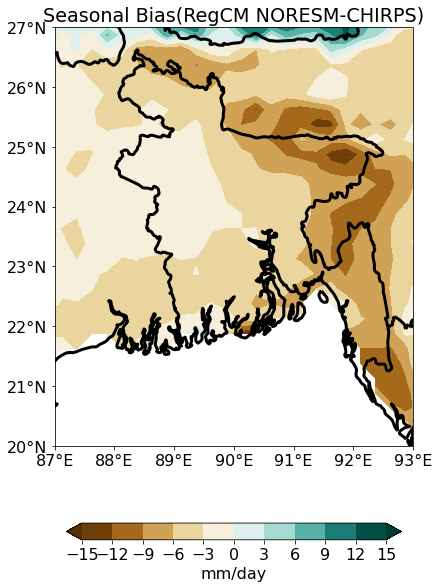

In [21]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature
plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['longitude'], bias['latitude'],bias[:,:],
                  levels=np.arange(-15,15+3,3), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-15,15+3,3),  orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias(RegCM NORESM-CHIRPS)')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias remo(noresm-chirps).png")



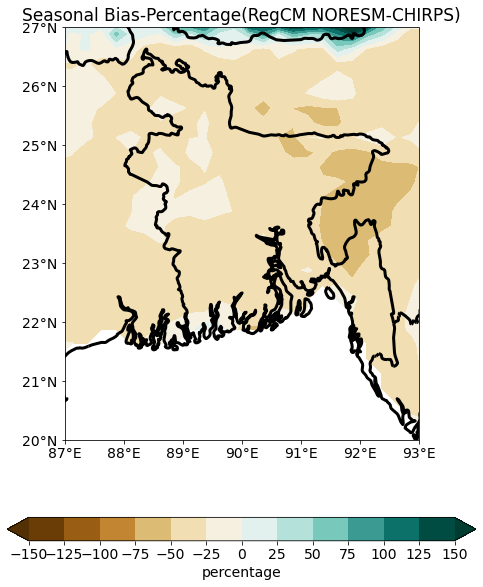

In [22]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '14'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['longitude'], bias_percentage['latitude'],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25),orientation = 'horizontal',shrink=0.7, fraction = 0.05 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias-Percentage(RegCM NORESM-CHIRPS)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage remo(noresm-chirps).png")







In [23]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r